In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch


In [18]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


ada 1 data kosong, karena cuma satu dan karena ini data soal negara mungkin saja datanya terlalu di sayangkan jika di drop, maka saya akan mencoba mengisi missing values itu dengan teks yang seharusnya ada di sana

In [20]:
row_with_null = df[df.isnull().any(axis=1)]

# 4. Tampilkan baris tersebut
print("\nBaris dengan value kosong:")
print(row_with_null)


Baris dengan value kosong:
        Country Other names ISO 3166-1 alpha-3 CODE  Population Continent  \
135  Montenegro         NaN                     MNE      628205    Europe   

     Total Cases  Total Deaths  Tot Cases//1M pop  Tot Deaths/1M pop  \
135       233326          2705             371417               4306   

     Death percentage  
135          1.159322  


In [21]:
df['Other names'] = df['Other names'].fillna('Montenegro')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              225 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


Data kosong sudah teratasi untuk data kosong ada di country Monterogo, jadi othernames nya aku isi monterogo ku isi secara manual karena datanya hanya 1

In [23]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [24]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
df['Death percentage'] = (df['Total Deaths'] / df['Total Cases']) * 100

fig = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Death percentage",  # Gunakan kolom hasil hitungan
                    hover_name="Country",
                    title="World Map of COVID-19 Death Percentage",
                    projection="natural earth",
                    # Mengatur warna: Biru (Rendah) ke Merah (Tinggi)
                    color_continuous_scale=["blue", "red"]
                    )

fig.show()

Negara Yeman memiliki persentase kematian tertinggi daripada negara negara lain

In [33]:
# Kelompokkan data berdasarkan Continent
continent_group = df.groupby('Continent')[['Total Cases', 'Total Deaths']].sum().reset_index()

# Hitung Death Percentage per benua dea
continent_group['Death percentage'] = (continent_group['Total Deaths'] / continent_group['Total Cases']) * 100

# Urutkan data dari yang terbesar
continent_group = continent_group.sort_values('Death percentage', ascending=False)

# Buat Bar Chart dengan gradasi warna Biru-Merah
fig = px.bar(continent_group,
             x='Continent',
             y='Death percentage',
             color='Death percentage',
             title='COVID-19 Death Percentage by Continent',
             color_continuous_scale=["white", "black"],
             text_auto='.2f'  # Menampilkan angka di atas batang
             )

fig.show()

Negara dengan death percentace adalah Amerika, dan di lanjutkan dengan Africa, sementara oceania adalah yang terkecil. mungkin juga karena penduduknya kecil jadi jarak antar manusia cukup jauh 

In [73]:
df = df.rename(columns={
    'ISO 3166-1 alpha-3 CODE': 'ISO_Code',
    'Total Cases': 'Total_Cases',
    'Total Deaths': 'Total_Deaths',
    'Tot\xa0Cases//1M pop': 'Cases_per_1M',
    'Tot\xa0Deaths/1M pop': 'Deaths_per_1M'
})

# Encode

In [69]:
# duplicate df
df_encoded = df.copy()

nominal_cols = ['Country', 'Other names', 'ISO_Code', 'Continent']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)


{'Continent': {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5},
 'Country': {0.0: 0,
             1.0: 1,
             2.0: 2,
             3.0: 3,
             4.0: 4,
             5.0: 5,
             6.0: 6,
             7.0: 7,
             8.0: 8,
             9.0: 9,
             10.0: 10,
             11.0: 11,
             12.0: 12,
             13.0: 13,
             14.0: 14,
             15.0: 15,
             16.0: 16,
             17.0: 17,
             18.0: 18,
             19.0: 19,
             20.0: 20,
             21.0: 21,
             22.0: 22,
             23.0: 23,
             24.0: 24,
             25.0: 25,
             26.0: 26,
             27.0: 27,
             28.0: 28,
             29.0: 29,
             30.0: 30,
             31.0: 31,
             32.0: 32,
             33.0: 33,
             34.0: 34,
             35.0: 35,
             36.0: 36,
             37.0: 37,
             38.0: 38,
             39.0: 39,
             40.0: 40,
             

# K MEANS

C:\Users\Ivana Caroline\AppData\Local\Temp\ipykernel_13808\976054048.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Ivana Caroline\AppData\Local\Temp\ipykernel_13808\976054048.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




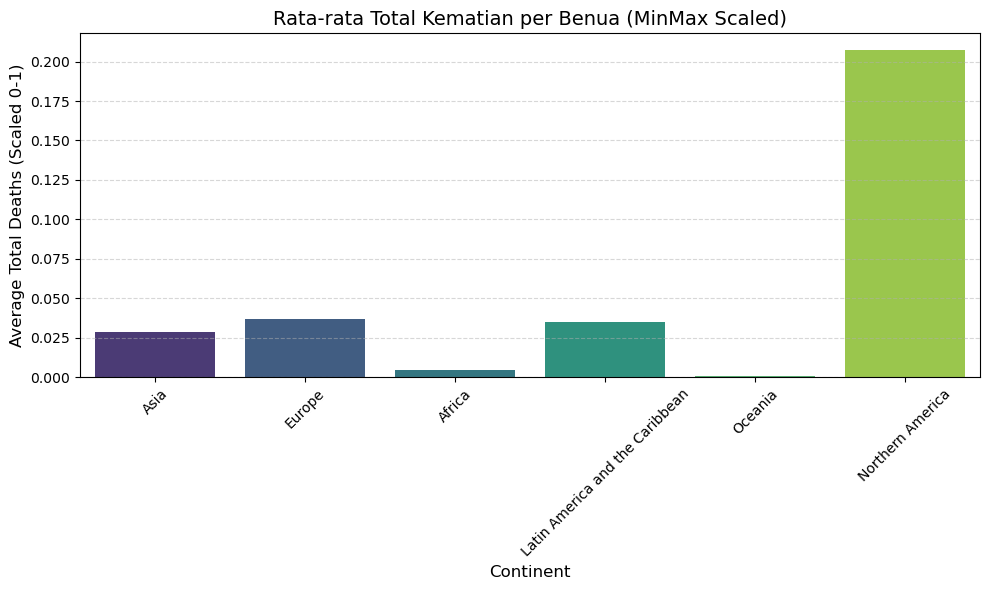

In [99]:
scaler = MinMaxScaler()

# Kita hanya perlu men-scale data Numerik (Total_Deaths)
# Continent biarkan dalam bentuk aslinya (Teks) agar Bar Chart bisa membacanya sebagai kategori
y_data = df_encoded[['Total_Deaths']]
y_scaled = scaler.fit_transform(y_data)

# Buat DataFrame gabungan untuk plotting
plot_df = pd.DataFrame({
    'Continent': df['Continent'],           # Teks Asli (Asia, Europe, dll)
    'Total_Deaths_Scaled': y_scaled.flatten() # Data yang sudah di-scale (0-1)
})

# ==========================================
# 3. VISUALIZATION (BAR CHART)
# ==========================================
plt.figure(figsize=(10, 6))

# Bar Plot secara otomatis menghitung RATA-RATA (Mean) untuk setiap kategori
# ci=None digunakan untuk menghilangkan garis error (opsional, agar lebih bersih)
sns.barplot(
    data=plot_df,
    x='Continent',
    y='Total_Deaths_Scaled',
    palette='viridis',
    ci=None 
)

plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average Total Deaths (Scaled 0-1)", fontsize=12)
plt.title("Rata-rata Total Kematian per Benua (MinMax Scaled)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Rotasi label jika perlu
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

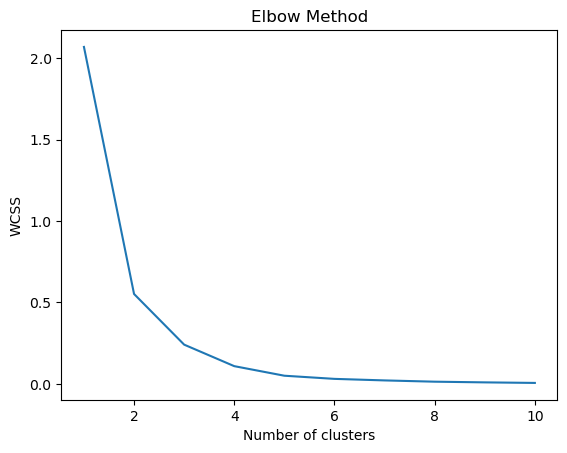

In [ ]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(y_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [102]:
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters  WCSS
0                   1  2.07
1                   2  0.55
2                   3  0.24
3                   4  0.11
4                   5  0.05
5                   6  0.03
6                   7  0.02
7                   8  0.01
8                   9  0.01
9                  10  0.01


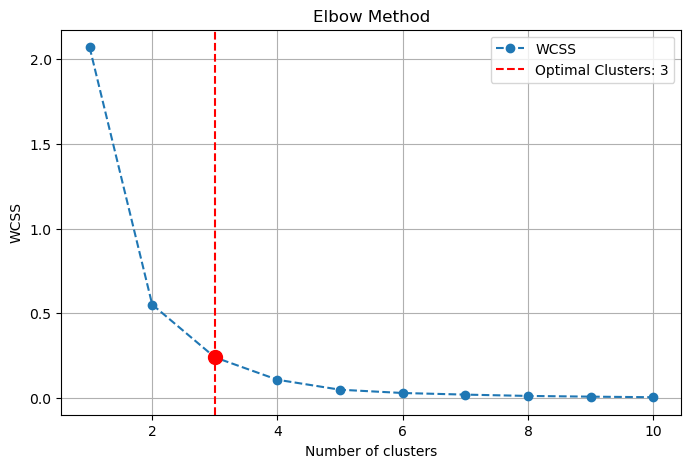

The optimal number of clusters is: 3


In [103]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [107]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(y_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,Country,Other names,ISO_Code,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M,Deaths_per_1M,Death percentage,Death_Percentage,Cluster,Cluster_Rank,Cluster_Label,KMeans_Cluster
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.31,4.31,1,0,Low Impact (Aman),0
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.28,1.28,1,0,Low Impact (Aman),0
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.59,2.59,1,0,Low Impact (Aman),0
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.38,0.38,1,0,Low Impact (Aman),0
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.92,1.92,1,0,Low Impact (Aman),0


In [112]:
warna_cluster = {
    "Low Impact": "blue",
    "Medium Impact": "orange",
    "High Impact": "red"
}

print("Menampilkan Peta 3 Cluster...")

# Kode asli Anda yang dimodifikasi:
fig = px.choropleth(df_map,
                    locations="ISO_Code",
                    color="Cluster_Label",   # Ganti 'Death percentage' jadi Label Cluster
                    hover_name="Country",
                    hover_data=['Total_Cases', 'Total_Deaths'], # Info tambahan saat hover
                    title="World Map of COVID-19 Clusters (3 Groups)",
                    projection="natural earth",
                    
                    # --- BAGIAN YANG DIUBAH ---
                    # Karena Cluster adalah kategori (teks), kita pakai 'color_discrete_map'
                    # bukan 'color_continuous_scale'
                    color_discrete_map=warna_cluster,
                    
                    # Memastikan urutan legenda rapi
                    category_orders={"Cluster_Label": ["Low Impact", "Medium Impact", "High Impact"]}
                    )

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

Menampilkan Peta 3 Cluster...


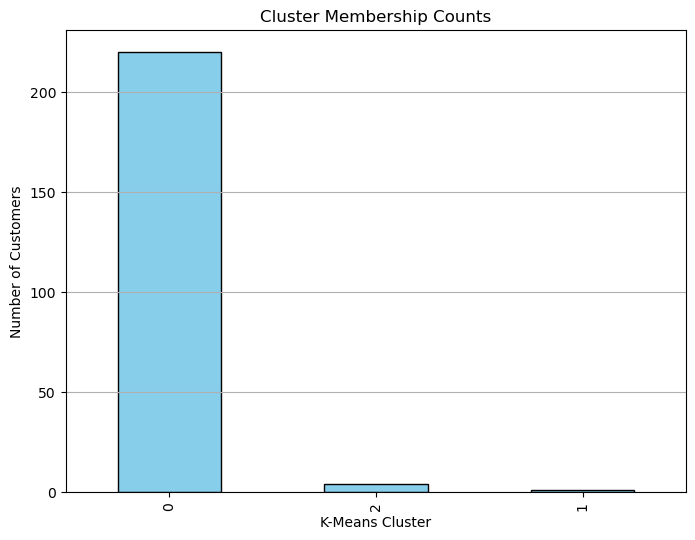

In [145]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [146]:
cluster_summary = df.groupby(clusters).agg({'Death_Percentage': ['mean', 'min', 'max'],
                                              'Total_Cases': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Death_Percentage            Total_Cases                    
                           mean  min   max        mean       min       max
KMeans_cluster                                                            
0                          1.42 0.00 18.15  1423389.42         1  25997852
1                          1.23 1.23  1.23 81839052.00  81839052  81839052
2                          2.80 1.21  5.71 24147775.50   5665376  43029044

# Hierarchical Clustering Modeling

Skipping Ward linkage with Manhattan metric (not supported).


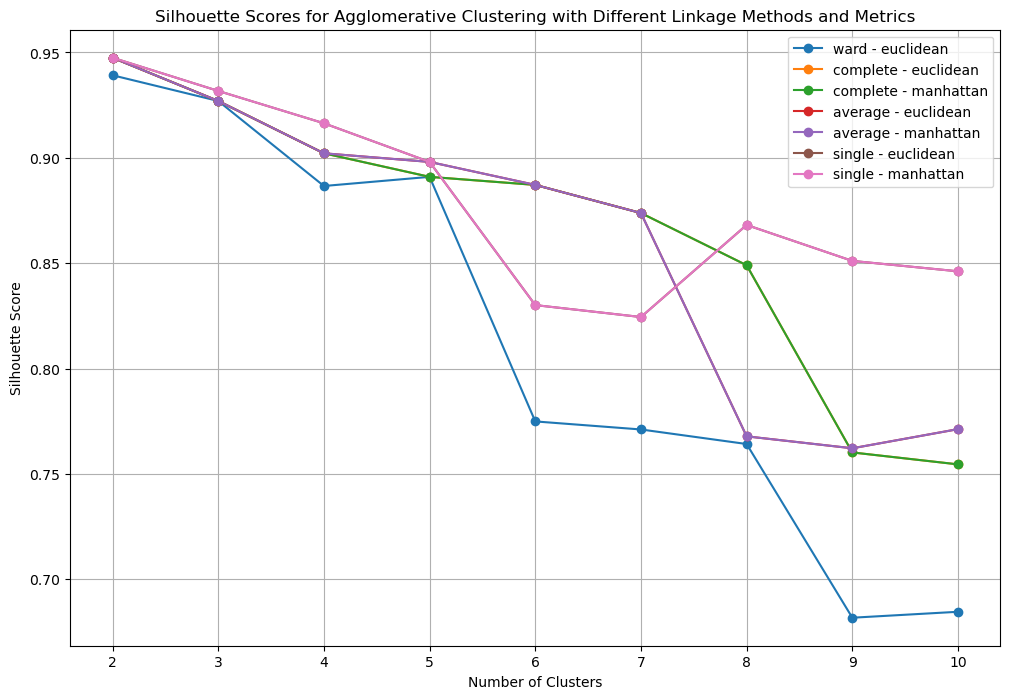

Best Silhouette Score: 0.947507868718416
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [115]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(y_scaled)
            silhouette_avg = silhouette_score(y_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

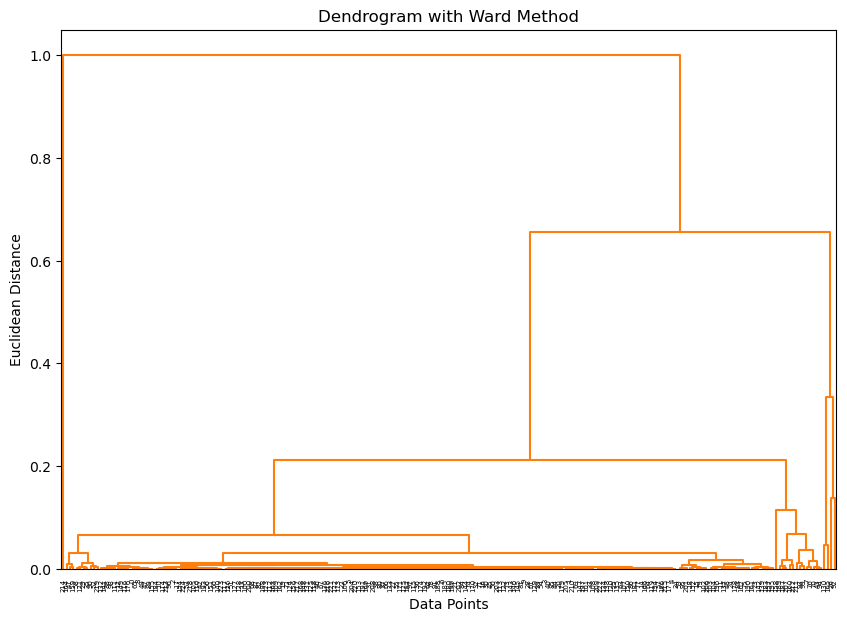

In [120]:
# Ward Method
linked = linkage(y_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [140]:
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(y_scaled)

ss = silhouette_score(y_scaled, y_hc)
print(ss)

0.947507868718416


In [141]:
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc = agglo.fit_predict(y_scaled)

ss = silhouette_score(y_scaled, y_hc)
print(ss)

0.9391824316594066


In [142]:
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,Other names,ISO_Code,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M,Deaths_per_1M,Death percentage,Death_Percentage,Cluster,Cluster_Rank,Cluster_Label,KMeans_Cluster,Agglo
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.31,4.31,1,0,Low Impact,0,1
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.28,1.28,1,0,Low Impact,0,1
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.59,2.59,1,0,Low Impact,0,1
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.38,0.38,1,0,Low Impact,0,1
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.92,1.92,1,0,Low Impact,0,1


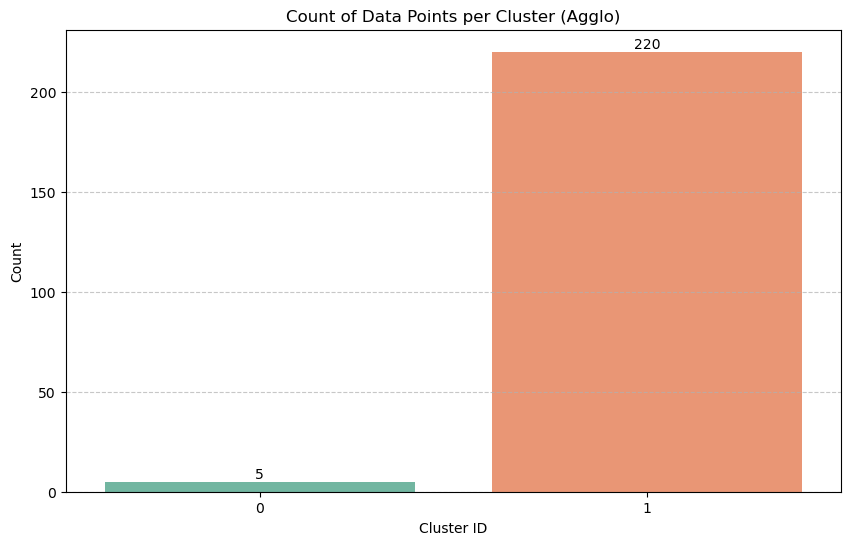

In [143]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [144]:

# Filter data bersih untuk peta
df_map = df[df['Cluster_Label'] != 'No Data'].sort_values('Cluster_Rank')

fig = px.choropleth(
    df_map,
    locations="ISO_Code",
    color="Cluster_Label",
    hover_name="Country",
    hover_data=['Total_Cases', 'Total_Deaths'],
    title=f"World Map of COVID-19 (Hierarchical Clustering: K={best_n_clusters})",
    projection="natural earth",
    color_discrete_map=colors, # Warna konsisten
    category_orders={"Cluster_Label": list(label_map.values())} # Urutan legenda
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

In [149]:
cluster_summary = df.groupby('Agglo').agg({'Death_Percentage': ['mean', 'min', 'max'],
                                              'Total_Cases': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('Agglo_cluster')

cluster_summary

Death_Percentage            Total_Cases                   
                          mean  min   max        mean      min       max
Agglo_cluster                                                           
0                         2.48 1.21  5.71 35686030.80  5665376  81839052
1                         1.42 0.00 18.15  1423389.42        1  25997852

# Cluster summary
For KMeans - ada 3 cluster. hal yang beda terjadi di hierarchical, dimana dia hanya bisa merekomendasikan 2 cluster saja, mungkin karena memang hanya ada sedikit negara yang memilki Impact yang tinggi

# Government policy recommendations 

Insight untuk negara negara yang masih di zona 2/1 mungkin bisa memblock orang yang dari negara tersebut, dan jika memang harus wajib karantina 14 hari, dan untuk negara di zona 3 dimana banyak yang terkena covid himbau lebih lagi mengenai kebersihan dan kehigenisan, perlu juga pelajari sosial distancing, menghindari pertemuan tatap muka yang tidak diperlukan

# Compare
Untuk Pembagian terbaik, saya lebih suka KMeans karena KMeans bisa mengelompokan semua negara, sementara Hierarchical Clustering Modeling hanya merekomendasikan 2 clustering saja dan tidak peduli dengan sedikit cluster yang masi tersisa